# Hands on: Dimensionality Reducation PCA & LDA comparison

## PCA
The Principal Component Analysis (PCA) is a popular unsupervised learning technique for reducing the dimensionality of data. It increases interpretability, at the same time, it minimizes information loss. Through the projections into the principal components, it helps to find the most significant features in a dataset. 


## LDA
Linear Discriminant Analysis (LDA) is a predictive modeling algorithm for multi-class classification. This supervised learning technique can also be used as a dimensionality reduction technique, providing a projection that best separates the examples by their assigned class.

**Both tecnhiques easier the plotting of the data (throught the projections) in 2D and 3D**

### Overview

- [The Data](#chi)</a>

- [Import the Wine dataset to a dataframe](#chapi_1)</a>

- [Data Information and Visualization](#chapi_2)</a>


-----------------

- [1. Data Preprocessing](#ch1)</a>

   - [1.1. Checking Missing Values](#ch1_1)</a>
    
   - [1.2. Define Predictor and Target Attributes](#ch1_2)</a>
    
   - [1.3. Split the Data into Training and Testing](#ch1_3)</a>
    
   - [1.4. Feature Scaling](#ch1_4)</a>

- [2. Dimensionality reduction](#ch2)</a>

   - [2.1. using PCA](#ch2_1)</a>
    
   - [2.2. using LDA](#ch2_1)</a>
    
   - [2.3. Visualization and comparison of the dimensionality reduction tecnhiques](#ch2_1)</a>
    
    

# The Data <a name="chi"></a>
### The Wine dataset contains  the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. 
### The analysis determined the quantities of 13 constituents found in each of the ***three*** types of wines.
***(3-class problem)***

The attributes are: 
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

https://archive.ics.uci.edu/ml/datasets/wine

## Import the Wine dataset to a dataframe (https://archive.ics.uci.edu/ml/datasets/wine)
<a name="chapi_1"></a>

### Import  Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

### Import  Dataset

In [2]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## Data Information and Visualization <a name="chapi_2"></a> 

### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### Visualize Target Class Label Distributiuon

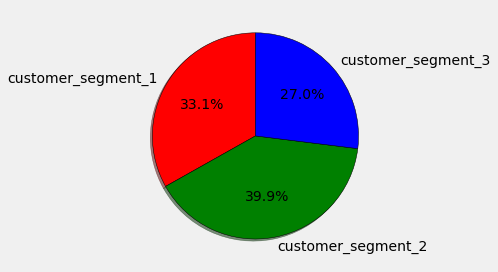

In [4]:
plt.style.use('fivethirtyeight')

seg1 = df[df['Customer_Segment'] == 1].shape[0]
seg2 = df[df['Customer_Segment'] == 2].shape[0]
seg3 = df[df['Customer_Segment'] == 3].shape[0]


class_ = [seg1, seg2, seg3]
label = ['customer_segment_1', 'customer_segment_2', 'customer_segment_3']

plt.pie(class_, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'green', 'blue'])

plt.tight_layout()
plt.show()

## 1. Data Preprocessing <a name="ch1"></a>

### 1.1. Checking Missing Values <a name="ch1_1"></a>

In [5]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

### 1.2. Define Predictor and Target Attributes <a name="ch1_2"></a>

In [6]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

####  Predictor Attributes

In [7]:
X.head

<bound method NDFrame.head of      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \


#### Target Attribute

In [8]:
Y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64>

### 1.3. Split the Data into Training and Testing <a name="ch1_3"></a>

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Training Data

In [10]:
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)

X_train (142, 13)
Y_train (142,)


####  Testing Data

In [11]:
print("X_test", X_test.shape)
print("X_test", Y_test.shape)

X_test (36, 13)
X_test (36,)


###  1.4. Feature Scaling <a name="ch1_4"></a>

In [12]:
standard_sc = StandardScaler()
X_train = standard_sc.fit_transform(X_train)
X_test = standard_sc.transform(X_test)

## 2. Dimensionality reduction  <a name="ch2"></a>

## 2.1. using PCA <a name="ch2_1"></a>

#### Import PCA

In [13]:
from sklearn.decomposition import PCA

#### Initialize the PCA (with 2 components)

In [14]:
pca = PCA(n_components = 2)

#### fitting the PCA model

In [15]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [16]:
#### explained the variance

In [17]:
explained_varience = pca.explained_variance_ratio_
explained_varience

array([0.35952175, 0.19820577])

## 2.2. using LDA <a name="ch2_2"></a>

#### Import LDA

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#### Initialize the LDA

In [19]:
lda = LDA(n_components = 2)

####  fitting the LDA model

In [20]:
X_train_lda = lda.fit_transform(X_train, Y_train)
X_test_lda = lda.transform(X_test)

#### explained the variance

In [21]:
explained_varience = lda.explained_variance_ratio_
explained_varience

array([0.73931691, 0.26068309])

## 2.3. Visualization and comparison of the dimensionality reduction tecnhiques <a name="ch2_3"></a>

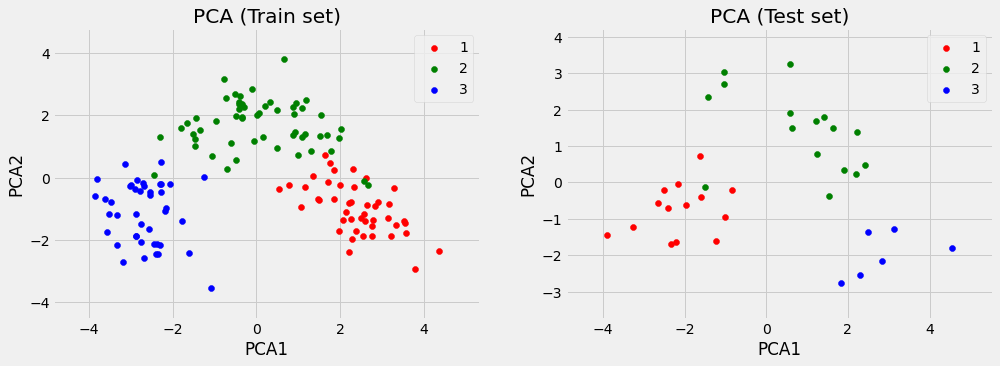

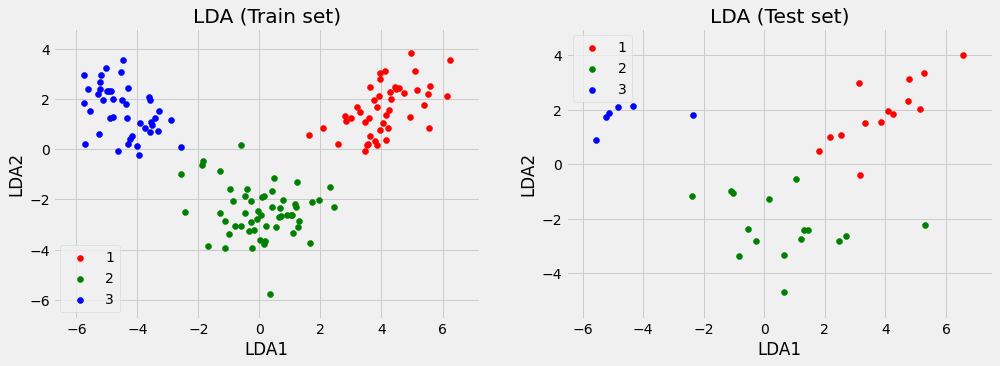

In [22]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(1, 2, figsize=(15,5))

# PCA - train set
X_set, y_set = X_train_pca, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.subplot(1, 2, 1)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('PCA (Train set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

# PCA - test set
X_set, y_set = X_test_pca, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.subplot(1, 2, 2)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('PCA (Test set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

fig, ax = plt.subplots(1, 2, figsize=(15,5))

# LDA - train set
X_set, y_set = X_train_lda, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.subplot(1, 2, 1)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('LDA (Train set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend()


# LDA - test set
X_set, y_set = X_test_lda, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.subplot(1, 2, 2)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('LDA (Test set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend()


plt.show()

## Question: which dimensionality reduction technique leads to better data separability?